In [117]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn

### Implement the following models in the language of your preference:

#### (a) Random graph

In [118]:
def random_graph(n, p):
    """Fix n - total number of nodes, fix p - the value of probablity, 
    create an empty graph - add n nodes to it, add edges to the graph randomly
    """
    
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)]) 
    
    #Erdos Renyi Model algorithm
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = rn.random()
                
                if r <= p:
                    G.add_edge(i, j)
                else:
                    continue
    return G

In [119]:
G = random_graph(10,0.5)

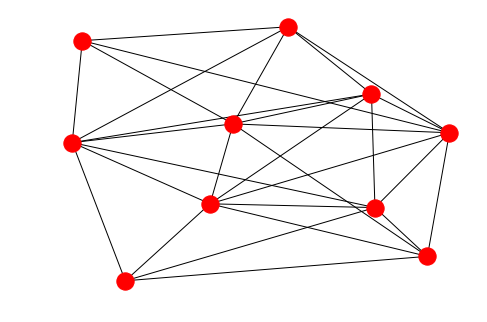

In [120]:
nx.draw(G)

#### (b) Watts-Strogatz model

The Watts-Strogatz model is a generative model which starts with a regular graph and rewires its edges randomly to produce graphs with small-world properties.

In [121]:
def watts_strogatz_graph(n, p, k, rewiring):
    """set the total number of nodes n, set the rewiring probability p,
    set the node degree k (an even integer)
    """
    
    k = k + 1
    G = nx.Graph()
    G.add_nodes_from([i for i in range(n)])       
    
    for i in G.nodes:
        for j in G.nodes:
            if (0 < abs(i - j) % (n - k / 2)) and (abs(i - j) % (n - k / 2) <= k / 2):
                 G.add_edge(i, j)
    
    if rewiring == True:
        for n in G.nodes:
            for l in list(G.neighbors(n)):
                r = rn.random()
                if r > p:
                    m=random.choice(list(G.nodes()))
                    G.remove_edge(n, l)
                    G.add_edge(n, m)
    return G

4

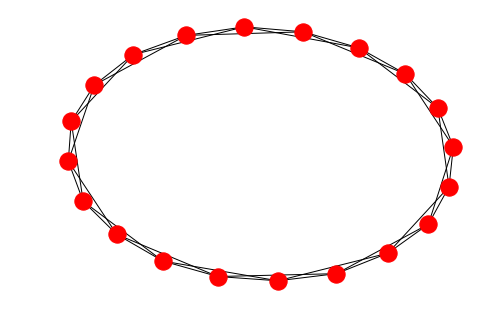

In [122]:
G=watts_strogatz_graph(20, 0.15, 4, False)
nx.draw(G)
G.degree(5)

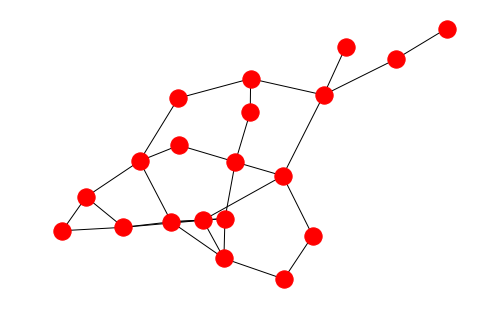

In [123]:
G=watts_strogatz_graph(20, 0.15, 4, True)
nx.draw(G)

#### (c) Barabasi-Albert model

In [130]:
def barabasi_albert_graph(n, m):
    """ n - total number of nodes (from user)
    m - the number of edges to be connected to the new node 
    """

    m0 = random.randint(2, n / 2) #we start with m0 nodes (each node has at least one link)
    #m = m0 - 1
    G = nx.path_graph(m0)
    
    #add new nodes
    for i in range(m0 + 1, n+1):
        G.add_node(i)
        deg = nx.degree(G) # k_i
        
        node_probabilities = {} # dictionary of probabilities that new node will connect with key node
        
        for u in G.nodes():
            node_probabilities[u] = deg[u] / sum(dict(deg).values()) # probability p_i=k_i/sum(k_j)
            
        node_probabilities_cumsum = []
        component = 0
        
        for n, p in node_probabilities.items():
            cumsum = [n, p + component]
            node_probabilities_cumsum.append(cumsum)
            component += p
            
        num_edges_added = 0
        target_nodes = [] # target nodes for new edges 
        
        #now when we have everything to add edges
        while(num_edges_added < m):
            p = rn.random()
            
            for k in range(len(G.nodes())):
                if p < node_probabilities_cumsum[k][1]:
                    target_node = node_probabilities_cumsum[k][0]
                    
                    if target_node in target_nodes:
                        continue
                
                    else:
                        target_nodes.append(target_node)
                        
                    G.add_edge(i, target_node)
                    num_edges_added += 1
                    
                else:
                    continue
    
    return G

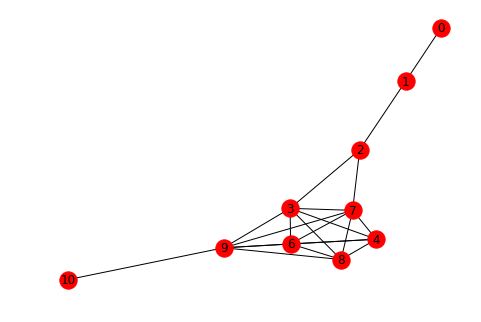

In [131]:
G=barabasi_albert_graph(10,2)
nx.draw(G, with_labels = True)